In [ ]:
#import stuff here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
%pip install bioinfokit
from bioinfokit.analys import stat

In [ ]:
# Uploaded Excel file
df = pd.read_excel('INF2178_A2_data.xlsx', sheet_name='ChildCareCentres')

# Select columns that are needed
filter_columns = ['AUSPICE', 'TGSPACE',  'TOTSPACE', 'subsidy']
df_child = df[filter_columns]

# Calculate the TGSPACE capacity rate within total space
df_child['TGSPACE_CAPACITY'] = df_child['TGSPACE'] / df_child['TOTSPACE']

# Display the DataFrame
df_child

<ipython-input-127-8a35d959ba48>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_child['TGSPACE_CAPACITY'] = df_child['TGSPACE'] / df_child['TOTSPACE']


,AUSPICE,TGSPACE,TOTSPACE,subsidy,cwelcc_flag,TGSPACE_CAPACITY
0,Non Profit Agency,20,164,Y,Y,0.121951
1,Non Profit Agency,0,83,Y,Y,0.000000
2,Non Profit Agency,10,102,Y,Y,0.098039
3,Non Profit Agency,15,65,Y,Y,0.230769
4,Non Profit Agency,10,26,Y,Y,0.384615
...,...,...,...,...,...,...
1058,Non Profit Agency,0,112,Y,Y,0.000000
1059,Non Profit Agency,25,60,N,N,0.416667
1060,Non Profit Agency,25,49,N,N,0.510204
1061,Non Profit Agency,0,56,Y,Y,0.000000


In [ ]:
# Check missing value
df_child.isnull().sum()

AUSPICE             0
TGSPACE             0
TOTSPACE            0
subsidy             0
cwelcc_flag         0
TGSPACE_CAPACITY    0
dtype: int64

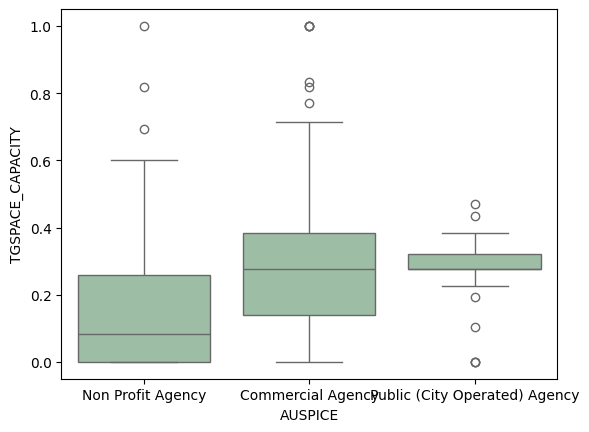

In [ ]:
# Generate a boxplot to see the data distribution of TGSPACE_CAPACITY by AUSPICE.
ax = sns.boxplot(x='AUSPICE', y='TGSPACE_CAPACITY', data=df_child, color='#99c2a2')

plt.show()


# One way ANOVA

In [ ]:
# Ordinary Least Squares (OLS) model
model = ols('TGSPACE_CAPACITY ~ C(AUSPICE)', data=df_child).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

# ANOVA table
res = stat()
res.anova_stat(df=df_child, res_var='TGSPACE_CAPACITY', anova_model='TGSPACE_CAPACITY ~ C(AUSPICE)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(AUSPICE),2.0,4.358882,2.179441,78.267943,1.976508e-32
Residual,1060.0,29.516651,0.027846,NaN,NaN


In [ ]:
#Post-hoc test using Tukey's HSD
res = stat()
res.tukey_hsd(df=df_child, res_var='TGSPACE_CAPACITY', xfac_var='AUSPICE', anova_model='TGSPACE_CAPACITY ~ C(AUSPICE)')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Non Profit Agency,Commercial Agency,0.133137,0.106754,0.159520,16.749990,0.001000
1,Non Profit Agency,Public (City Operated) Agency,0.151498,0.087067,0.215929,7.804596,0.001000
2,Commercial Agency,Public (City Operated) Agency,0.018361,-0.048054,0.084776,0.917624,0.772544


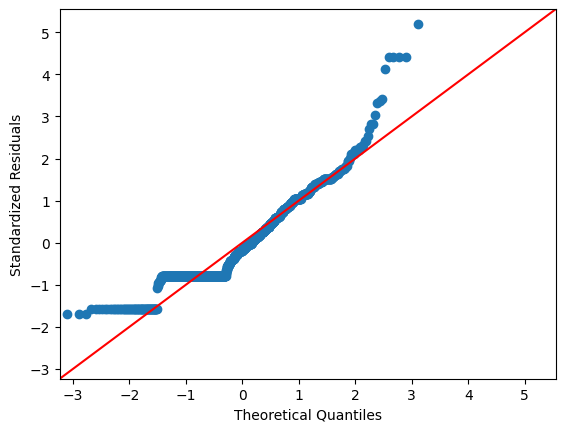

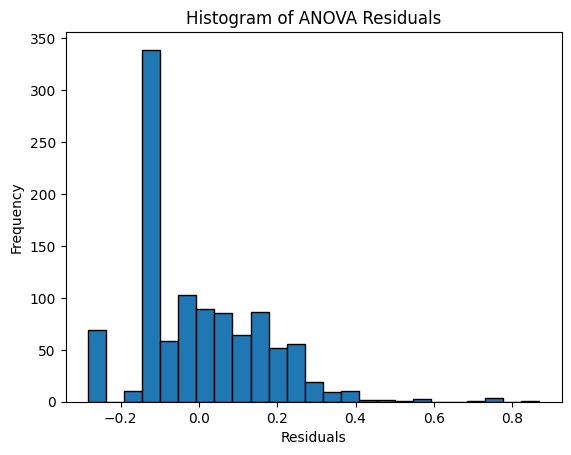

In [ ]:
#checking model diagnostics
import statsmodels.api as sm
import matplotlib.pyplot as plt

# assumption 1: res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.title("Histogram of ANOVA Residuals")
plt.show()

In [ ]:
#assumption 1: residuals are normally distributed: Shapiro Wilk test
w, pvalue = stats.shapiro(model.resid)
print(w,pvalue)

0.9210407733917236 3.783921846553299e-23


In [ ]:
#assumption 2: variances are homogenous: Levene's test when the sample is not normally distributed
res.levene(df=df_child, res_var='TGSPACE_CAPACITY', xfac_var='AUSPICE')
res.levene_summary

,Parameter,Value
0,Test statistics (W),12.658
1,Degrees of freedom (Df),2.000
2,p value,0.000


# Two-Way ANOVA

<Axes: xlabel='cwelcc_flag', ylabel='TGSPACE_CAPACITY'>

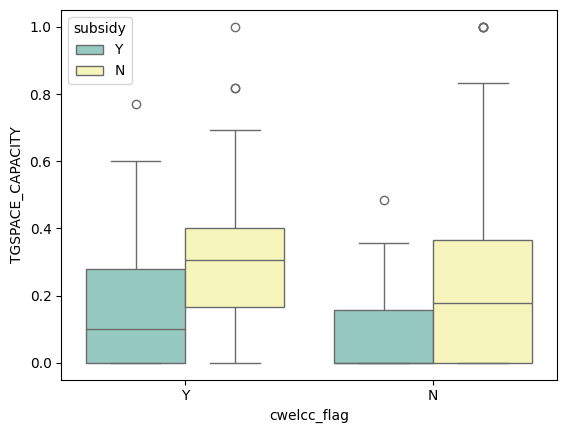

In [ ]:
sns.boxplot(x="cwelcc_flag", y="TGSPACE_CAPACITY", hue="subsidy",data=df_child, palette="Set3")

In [ ]:
# ANOVA table
model=ols('TGSPACE_CAPACITY ~ C(AUSPICE) + C(subsidy) + C(AUSPICE):C(subsidy)', data=df_child).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(AUSPICE),1.805762,2.0,33.214371,1.023111e-14
C(subsidy),0.605850,1.0,22.287458,2.662562e-06
C(AUSPICE):C(subsidy),0.162435,2.0,2.987757,5.082581e-02
Residual,28.760089,1058.0,NaN,NaN


In [ ]:
res = stat()
res.anova_stat(df=df_child, res_var='TGSPACE_CAPACITY', anova_model='TGSPACE_CAPACITY ~ C(AUSPICE) + C(subsidy) + C(AUSPICE):C(subsidy)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(AUSPICE),2.0,1.805762,0.902881,33.214371,1.023111e-14
C(subsidy),1.0,0.605850,0.605850,22.287458,2.662562e-06
C(AUSPICE):C(subsidy),2.0,0.162435,0.081218,2.987757,5.082581e-02
Residual,1058.0,28.760089,0.027183,NaN,NaN


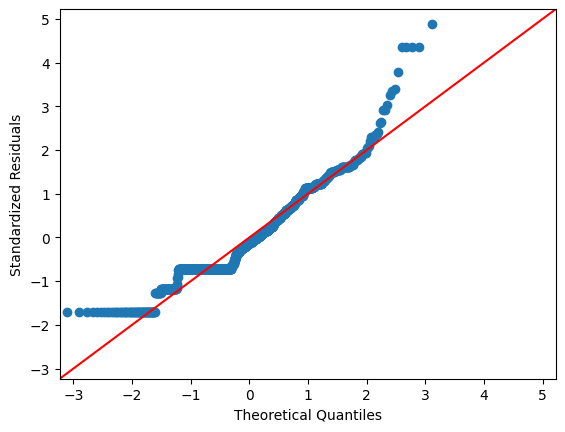

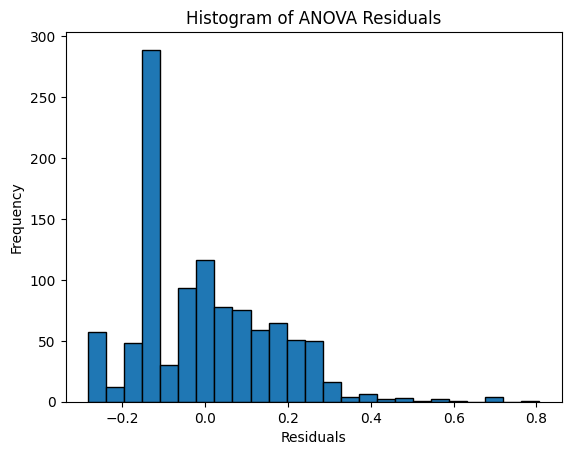

0.9417502284049988 5.191436253818806e-20


In [ ]:
# assumption 1: res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram to check distribution of residuals
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.title("Histogram of ANOVA Residuals")
plt.show()

#assumption 1: residuals are normally distributed: Shapiro Wilk test
w, pvalue = stats.shapiro(model.resid)
print(w,pvalue)

In [ ]:
#assumption 2: variances are homogenous: Levene's test when the sample is not normally distributed
group = df_child.groupby(['AUSPICE', 'subsidy'])['TGSPACE_CAPACITY'].apply(list)

# Perform Levene's test
statistic, p_value = stats.levene(*group)
print('Levene’s test statistic:', statistic)
print('Levene’s test p-value:', p_value)

Levene’s test statistic: 14.234728758325538
Levene’s test p-value: 2.5380441770613262e-11


In [ ]:
#post hoc test using Tukey's HSD
res.tukey_hsd(df=df_child, res_var='TGSPACE_CAPACITY',xfac_var='AUSPICE',anova_model='TGSPACE_CAPACITY ~ C(AUSPICE) + C(subsidy) + C(AUSPICE):C(subsidy)')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Non Profit Agency,Commercial Agency,0.133137,0.107070,0.159205,16.952856,0.001000
1,Non Profit Agency,Public (City Operated) Agency,0.151498,0.087838,0.215158,7.899121,0.001000
2,Commercial Agency,Public (City Operated) Agency,0.018361,-0.047260,0.083982,0.928738,0.768047


In [ ]:
res.tukey_hsd(df=df_child,res_var='TGSPACE_CAPACITY',xfac_var='subsidy',anova_model='TGSPACE_CAPACITY ~ C(AUSPICE) + C(subsidy) + C(AUSPICE):C(subsidy)')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Y,N,0.116215,0.095022,0.137408,15.217038,0.001


In [ ]:
res.tukey_hsd(df=df_child,res_var='TGSPACE_CAPACITY',xfac_var=['AUSPICE','subsidy'], anova_model='TGSPACE_CAPACITY ~ C(AUSPICE) + C(subsidy) + C(AUSPICE):C(subsidy)')
res.tukey_summary.head()

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,"(Non Profit Agency, Y)","(Non Profit Agency, N)",0.072954,0.022548,0.123361,5.843491,0.001
1,"(Non Profit Agency, Y)","(Commercial Agency, Y)",0.090446,0.033797,0.147096,6.446205,0.001
2,"(Non Profit Agency, Y)","(Commercial Agency, N)",0.160823,0.125040,0.196606,18.146008,0.001
3,"(Non Profit Agency, Y)","(Public (City Operated) Agency, Y)",0.162083,0.084304,0.239863,8.413584,0.001
4,"(Non Profit Agency, Y)","(Public (City Operated) Agency, N)",0.000000,-inf,inf,0.000000,0.900


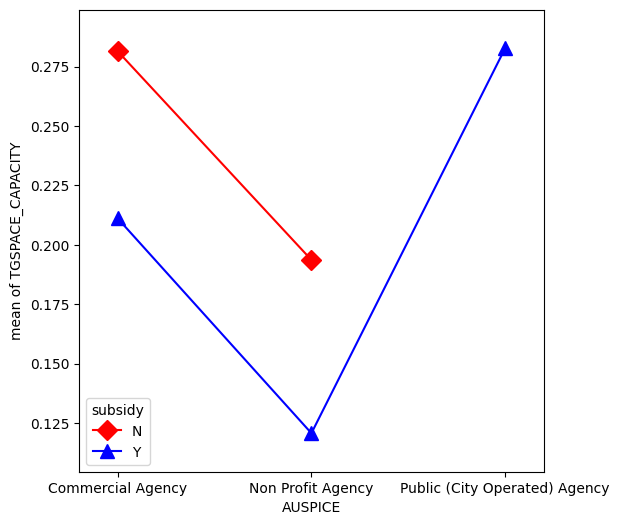

In [ ]:
#Create Interaction Plot
import matplotlib.pyplot as plt
from statsmodels.graphics.factorplots import interaction_plot

fig, ax = plt.subplots(figsize=(6,6))

fig = interaction_plot(x = df_child['AUSPICE'], trace=df_child['subsidy'], response=df_child['TGSPACE_CAPACITY'],
                       colors=["red","blue"], markers=["D","^"], ms=10, ax=ax)